In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

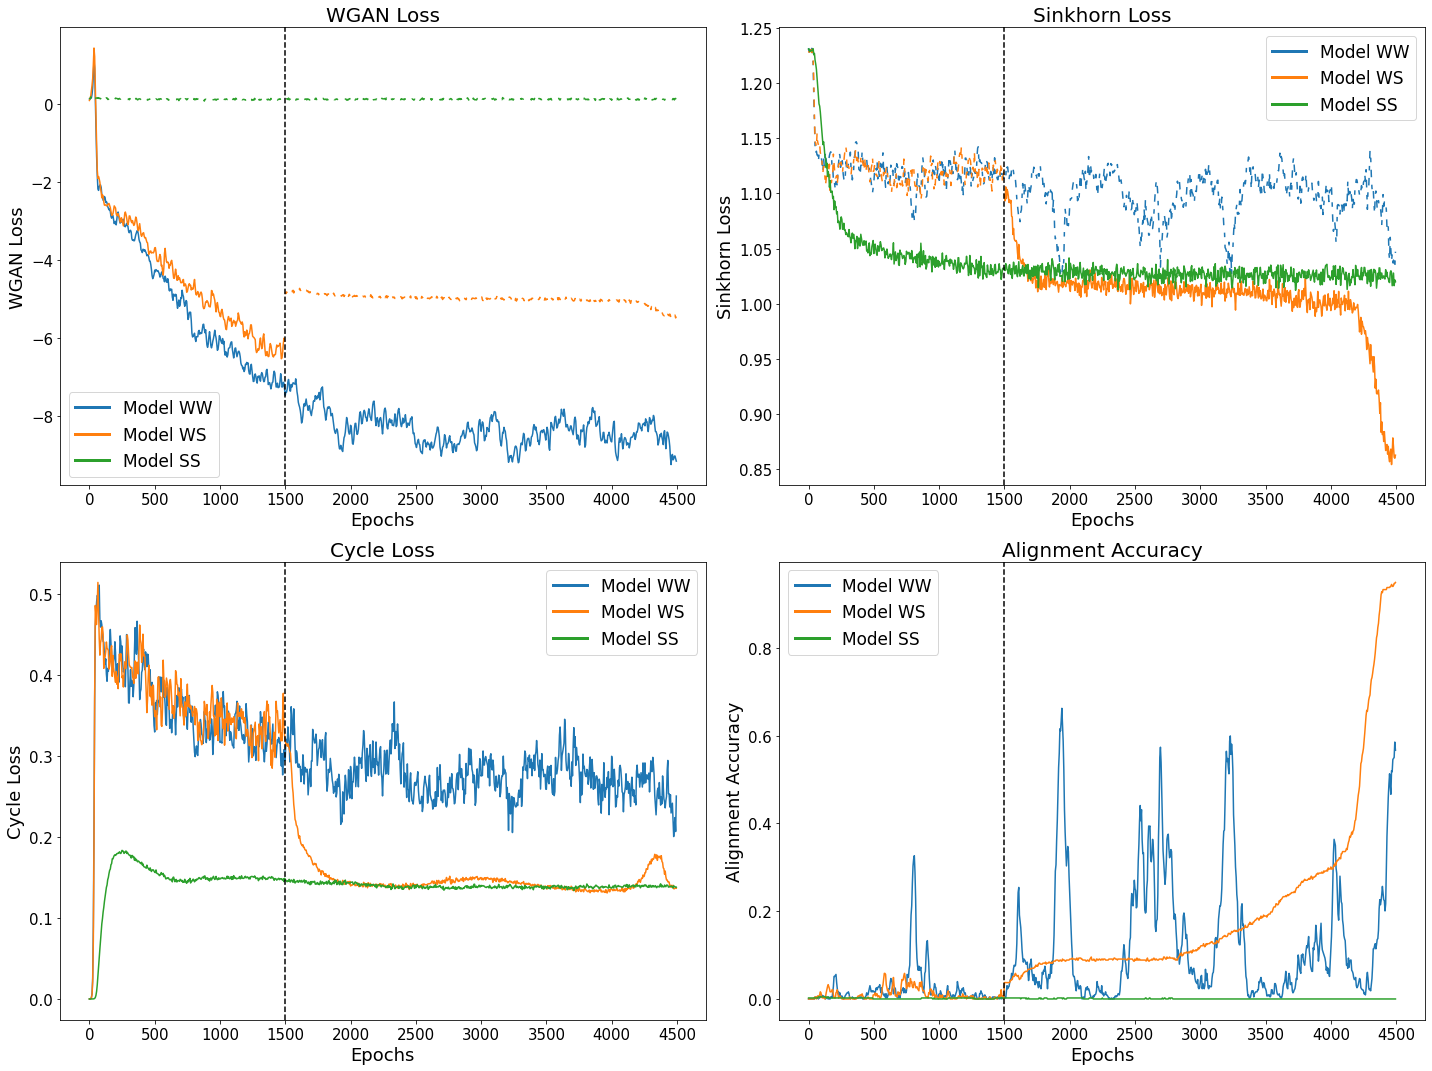

In [13]:
FIGSIZE = (20,15)
FONTSIZE = 24

fig, axes = plt.subplots(2, 2, figsize=FIGSIZE,sharey=False)

exp_dir = '../unsupervised/exp/loss_check/'

ax_titles = ['WGAN Loss', 'Sinkhorn Loss','Cycle Loss','Alignment Accuracy']
keys = ['wgan_loss','sh_loss','recon_loss', 'acc']
i_to_xy = {0: (0,0), 1:(0,1), 2:(1,0), 3:(1,1)}
model_to_color = {'model_ww': 'C0', 'model_ws':'C1', 'model_ss':'C2'}


for model_type in ['model_ww','model_ws','model_ss']:
    data = {key: [] for key in keys}
    with open(os.path.join(exp_dir, f'{model_type}/nn_text_0-nn_text_1/logger.log'),'r') as r:
        for line in r.readlines():
            if 'Bilex' in line:
                vals = line.split(' ')
                for val in vals:
                    for key in data.keys():
                        if key in val:
                            data[key].append(float(val.split(':')[1]))
    
    
    color = model_to_color[model_type]
    data_size = len(data['recon_loss'])
    log_every = 5
    alt_ls = (0, (3,5,5,5))
    cutoff = 1500//5
    indices = [log_every*i for i in range(0,data_size)]
    
    for i in range(4):
        x, y = i_to_xy[i]
        color = model_to_color[model_type]

        if keys[i] == 'sh_loss':
            if model_type == 'model_ww':
                axes[x,y].plot(indices, data['sh_loss'], ls=alt_ls, color=color)
            
            elif model_type == 'model_ws':
                axes[x,y].plot(indices[:cutoff], data['sh_loss'][:cutoff], ls=alt_ls, color=color)
                axes[x,y].plot(indices[cutoff:], data['sh_loss'][cutoff:], ls='-', color=color)
            
            else:
                axes[x,y].plot(indices, data['sh_loss'], ls='-', color=color)
            
        elif keys[i] == 'wgan_loss':
            if model_type == 'model_ss':
                axes[x,y].plot(indices, data['wgan_loss'], ls=alt_ls, color=color)
                
            elif model_type == 'model_ws':                
                axes[x,y].plot(indices[:cutoff], data['wgan_loss'][:cutoff], ls='-', color=color)
                axes[x,y].plot(indices[cutoff:], data['wgan_loss'][cutoff:], ls=alt_ls, color=color)
            
            else:
                axes[x,y].plot(indices, data['wgan_loss'], ls='-', color=color)
                
        else:
            axes[x,y].plot(indices, data[keys[i]], ls='-', color=color)
        
        # Add legend
        colors = list(model_to_color.values())
        lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
        labels = ['Model WW', 'Model WS', 'Model SS']
        axes[x,y].legend(lines, labels, prop={'size':17})
                    
        
for i in range(4):
    x, y = i_to_xy[i]
    axes[x,y].set_title(ax_titles[i], fontsize=20)
    axes[x,y].axvline(1500,ls='--', color='black')
    axes[x,y].set_xlabel('Epochs', fontsize=18)
    axes[x,y].set_xticks(np.arange(0,5000,500))
    axes[x,y].tick_params(axis='both', which='major', labelsize=15) 
    axes[x,y].set_ylabel(ax_titles[i],fontsize=18)

    
plt.tight_layout(pad=1.12, h_pad=None, w_pad=None, rect=None)
plt.savefig(f'./assets/accuracy_losses_grid.pdf')
plt.show()